In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_kernels
from scipy.stats import pearsonr

from collections import Counter
from enet_classifier import ElasticNetClassifier

<h1>The Lasso penalty</h1>

<p>This section shows how Lasso is able to select a group of the most relevant features in a dataset. The example use the Boston Housing dataset which is integrated in the sklearn package.</p>

<p>First of all, I use panda to load and analyse the dataset. </p>

In [58]:
from sklearn.datasets import load_boston

<p>The Boston dataset is small and contains 13 features, 506 samples and the output consist of the median value of owner-occupied homes in $1000's. This dataset is useful to regression problems.</p>

In [59]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.sample(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
195   0.01381  80.0   0.46   0.0  0.422  7.875   32.0  5.6484   4.0  255.0   
188   0.12579  45.0   3.44   0.0  0.437  6.556   29.1  4.5667   5.0  398.0   
232   0.57529   0.0   6.20   0.0  0.507  8.337   73.3  3.8384   8.0  307.0   
235   0.33045   0.0   6.20   0.0  0.507  6.086   61.5  3.6519   8.0  307.0   
51    0.04337  21.0   5.64   0.0  0.439  6.115   63.0  6.8147   4.0  243.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
160   1.27346   0.0  19.58   1.0  0.605  6.250   92.6  1.7984   5.0  403.0   
373  11.10810   0.0  18.10   0.0  0.668  4.906  100.0  1.1742  24.0  666.0   
315   0.25356   0.0   9.90   0.0  0.544  5.705   77.7  3.9450   4.0  304.0   
130   0.34006   0.0  21.89   0.0  0.624  6.458   98.9  2.1185   4.0  437.0   

     PTRATIO       B  LSTAT  MEDV  
195     14.4  394.23   2.97  50.0  
188     15.2  382.84   4.56  29.8  
232     17.4  385.91   2.47  41.7  
235     17.4  376.75  10.88  24.0  
51      16.8  393.97   9.43  20.5  
481     20.2  393.07   7.74  23.7  
160     14.7  338.92   5.50  27.0  
373     20.2  396.90  34.77  13.8  
315     18.4  396.42  11.50  16.2  
130     21.2  395.04  12.60  19.2

<p>The description of the dataset is the following:</p>

In [60]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<p>Next, we can observe the distribution of the data</p>

In [61]:
boston_df.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

<p>To apply the Lasso algorithm will be necessary to standardize the predictors X so that each column is centered and has unit variance</p>

<p>Now, I show the distribution of the target variable. The values of the output are distributed normally and have a few outliers</p>

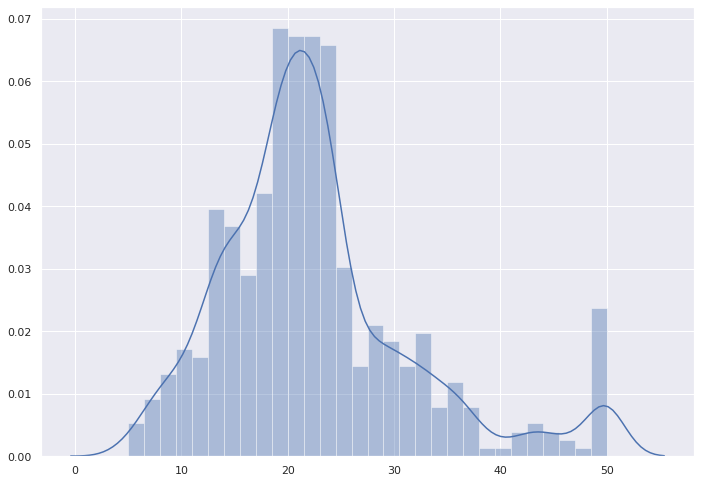

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.target, bins=30)
plt.show()

<p>Now I plot the correlation matrix to identify the linear relationships between
variables and the relationships between variables and output.</p>

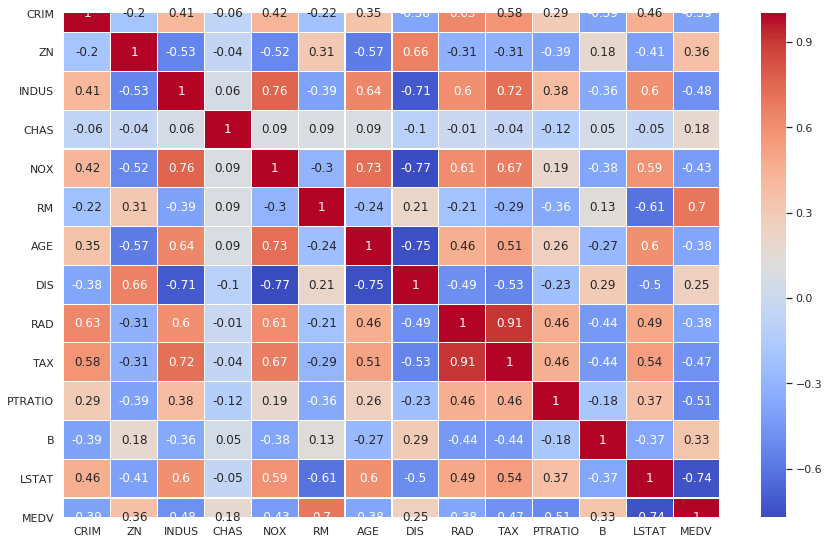

In [63]:
correlation_matrix = boston_df.corr().round(2)
sns.set(rc={'figure.figsize':(14.7,9.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, linewidths=.2)

<p>It can be seen that the RM feature has the strongest positive correlation (0.7) with the output MEDV. On the other hand, the variable LSTAT shows the strongest negative correlation (-0.74) with the target MEDV. Also, it is important to note the correlation between features. The features with a strong correlation are RAD and TAX, which have a correlation value of 0.91 and, the variable DIS shows a strong correlation with the variables NOX (-0.77) and AGE (-0.75) respectively.</p>

In [64]:
#Visualize dataframe
#sns.pairplot(boston_df, plot_kws={'alpha':0.6}, diag_kws={'bins': 30})
#plt.savefig('visualize_dataframe.png', bbox_inches='tight', dpi=100)

<p>Now, we can observe how the more relevant features (RM and LSTAT) vary wiht the output.</p>

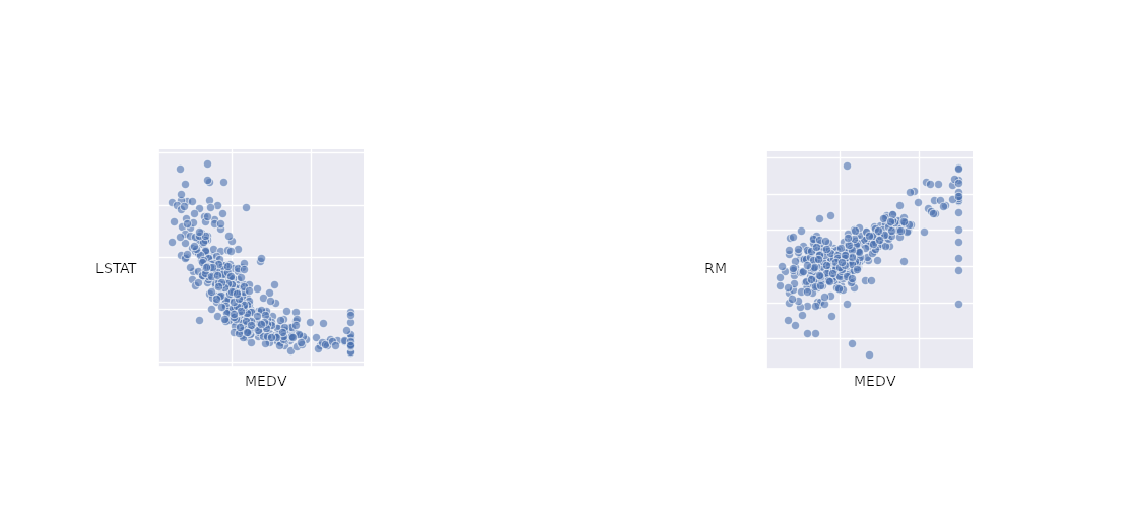

In [65]:
img_lstat = mpimg.imread('LSTAT_MEDV.png')
img_rm = mpimg.imread('RM_MEDV.png')
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.axis('off')
imgplot1 = plt.imshow(img_lstat)
plt.subplot(122)
imgplot2 = plt.imshow(img_rm)
plt.axis('off')
plt.show()

<h1>Linear Regression</h1>

<p>Next, I want to compare the performance of the Lasso Regression with the performance of a linear regression model.</p>

<p>First, I split the data into training and test sets. I use the 80% of data for the training set and, the remaining 20% of data for the test set.</p>

In [66]:
X = boston['data']
Y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

print("Data shape on training set {}".format(X_train.shape))
print("Data shape on test set {}".format(X_test.shape))
print("Data shape on training output set {}".format(y_train.shape))
print("Data shape on test output set {}".format(y_test.shape))

Data shape on training set (404, 13)
Data shape on test set (102, 13)
Data shape on training output set (404,)
Data shape on test output set (102,)


<p>Second, it is important to standardize the data set. Without the standardization step the Lasso would depend on the units used to measure the predictors. So, we should standardize the training set then, we use the same parameters obtained in the training set to standardize the test set.</p>

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

<p>Now, we can apply a linear regression model and measure the performance on the trainign and on the test set. Also, we get the coefficients of the model, later we will use the linear regression coefficients to compare the coefficients obtained with the Lasso model.</p>

In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
data_comparison = np.ones((2,4))

y_train_predict = lr.predict(x_train)
rmse = (mean_squared_error(y_train, y_train_predict))

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[0][0] = rmse

y_test_predict = lr.predict(x_test)
rmse = (mean_squared_error(y_test, y_test_predict))
print("The model performance for test set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[0][1] = rmse

The model performance for training set
RMSE is 22.477090408387628


The model performance for test set
RMSE is 20.869292183770817




In [70]:
lr_train_score = lr.score(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)

print("Linear regression train score {}".format(lr_train_score))
print("Linear regression test score {}".format(lr_test_score))

data_comparison[0][2] = lr_train_score
data_comparison[0][3] = lr_test_score

Linear regression train score 0.738339392059052
Linear regression test score 0.7334492147453076


In [71]:
lr.coef_

array([-1.13502719,  1.15814527,  0.00737057,  0.68709635, -1.82837001,
        2.36271879,  0.03166538, -3.06632775,  3.16621482, -2.21457852,
       -2.08600876,  1.0449511 , -4.17627077])

<h1>Lasso</h1>

<p>The next step is to create the Lasso model and to obtain the coefficients. Then, I can compare the values for both models linear regression and lasso regression.</p>

In [92]:
mdl = Lasso(alpha=0.8)
mdl.fit(x_train, y_train)
lasso_coef = mdl.coef_

Text(0, 0.5, 'Value of $w_i$')

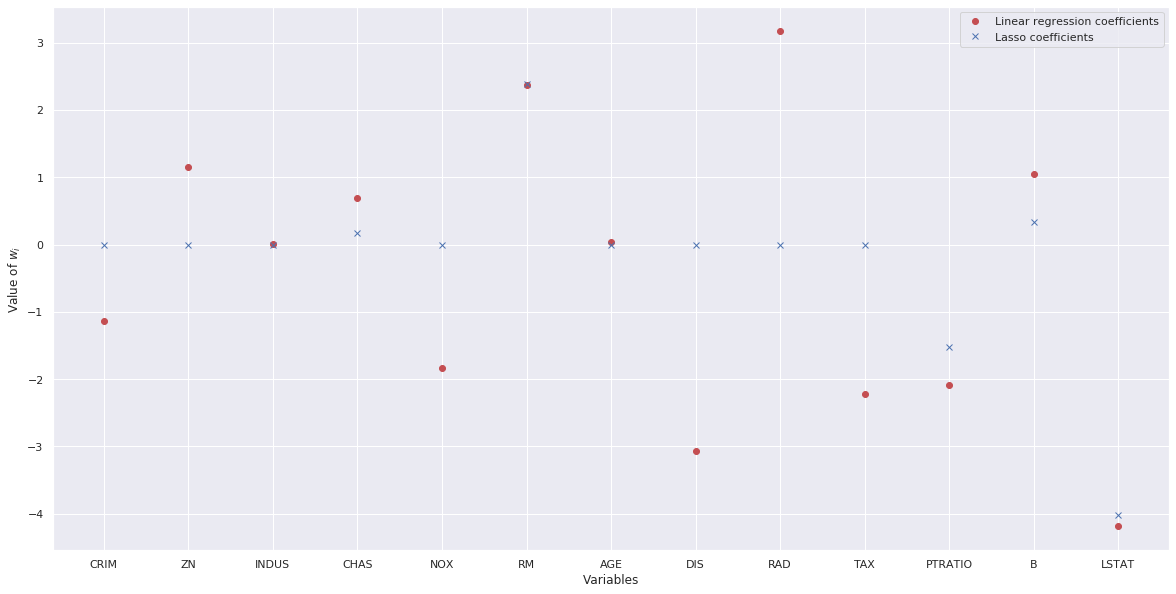

In [93]:
df2 = boston_df.drop(['MEDV'], axis=1)

plt.figure(figsize=(20,10))
plt.plot(lr.coef_, 'o' 'r', label="Linear regression coefficients")
plt.plot(mdl.coef_, 'x' 'b', label="Lasso coefficients")
plt.legend()
plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.xlabel("Variables")
plt.ylabel("Value of $w_i$")

<p>The graph above shows the values of the coefficients for both, linear regression and lasso regression. According with the graph, with alpha = 0.8 the Lasso model sets seven of the thirteen predictors to zero. Also, Lasso tends to shrink the coefficients to the other features towards zero.</p>
<p>The coefficients with the highest values are the coefficients for LSTAT and RM. This is consistent with the results of the correlation matrix. So, Lasso selects the more important features in the dataset.</p>
<p>Changing the value for alpha we can set different coefficients to zero. The figure below shows how the Lasso set to zero the coefficients when alpha changes. With larger values for alpha Lasso shrink more coefficients to zero. When alpha decreases the Lasso allows to set more coefficients with a value different to zero.</p>

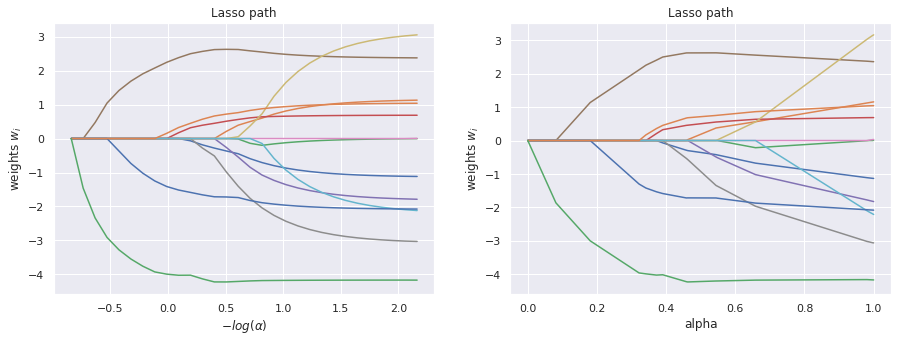

In [94]:
alphas, coef_path, _ = lasso_path(x_train,y_train, coef_init=mdl.coef_, n_alphas=30)
_, _, coefs = lars_path(x_train,y_train,method="lasso")

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(-np.log10(alphas), coef_path.T)
plt.xlabel(r'$-log(\alpha)$')
plt.ylabel('weights $w_i$')
plt.title('Lasso path');

plt.subplot(1,2,2)
plt.plot(xx, coefs.T)
plt.xlabel(r'alpha')
plt.ylabel('weights $w_i$')
plt.title('Lasso path');

plt.show()

<p>The next step is to measure the performance of the lasso model then we can compare the performance between the linear model and lasso model.</p>

In [19]:
y_train_predict = mdl.predict(x_train)
rmse = mean_squared_error(y_train, y_train_predict)

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[1][0] = rmse

y_test_predict = mdl.predict(x_test)
rmse = mean_squared_error(y_test, y_test_predict)
print("The model performance for test set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[1][1] = rmse

The model performance for training set
RMSE is 22.47962288310184


The model performance for test set
RMSE is 20.776006933221332




In [20]:
mdl_train_score = mdl.score(x_train, y_train)
mdl_test_score = mdl.score(x_test, y_test)

print("Lasso train score {}".format(mdl_train_score))
print("Lasso test score {}".format(mdl_test_score))

data_comparison[1][2] = mdl_train_score
data_comparison[1][3] = mdl_test_score

Lasso train score 0.7383099109802612
Lasso test score 0.7346406905542466


In [21]:
df_comparison = pd.DataFrame(data_comparison, 
                             columns=['MSE training set', 'MSE test set', 'SCORE training set', 'SCORE test set'],
                            index = ['Linear Regression', 'Lasso Regression'])

df_comparison

MSE training set  MSE test set  SCORE training set  \
Linear Regression         22.477090     20.869292            0.738339   
Lasso Regression          22.479623     20.776007            0.738310   

                   SCORE test set  
Linear Regression        0.733449  
Lasso Regression         0.734641

<p>The table above shows that the performance for both models, the linear model and lasso model is similar.</p>

<h1>Cross-validation</h1>

<p>The alpha value controls the complexity of the model. In order to estimate the best value for alpha we can use cross validation. The figure below shows the cross-validation error curve for the Boston dataset. The dashed lines represent the scores plus and minus the standard error in the cross validated estimates of the prediction error.</p>

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


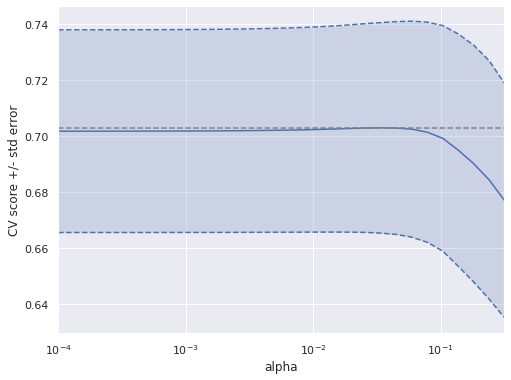

In [22]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

<h1>Elastic Net</h1>

<p>Lasso is not good to handle highly correlated variables. The coefficient paths tend to be erratic or show unstable behavior. To overcome these limitations we can use a regularization method which is called Elastic net.</p>

<p>Using Elastic Net predictors that are highly correlated are selected together in their groups and, they share approximately the same value. The elastic net also tends to shrink the values to zero. The figure below compares the coefficients set for the linear regression model, the lasso model and, the elastic net model.</p>

<p>The figure below compares the coefficients set for linear regression model, the lasso model and, the elastic net model.</p>

ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.715729


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will

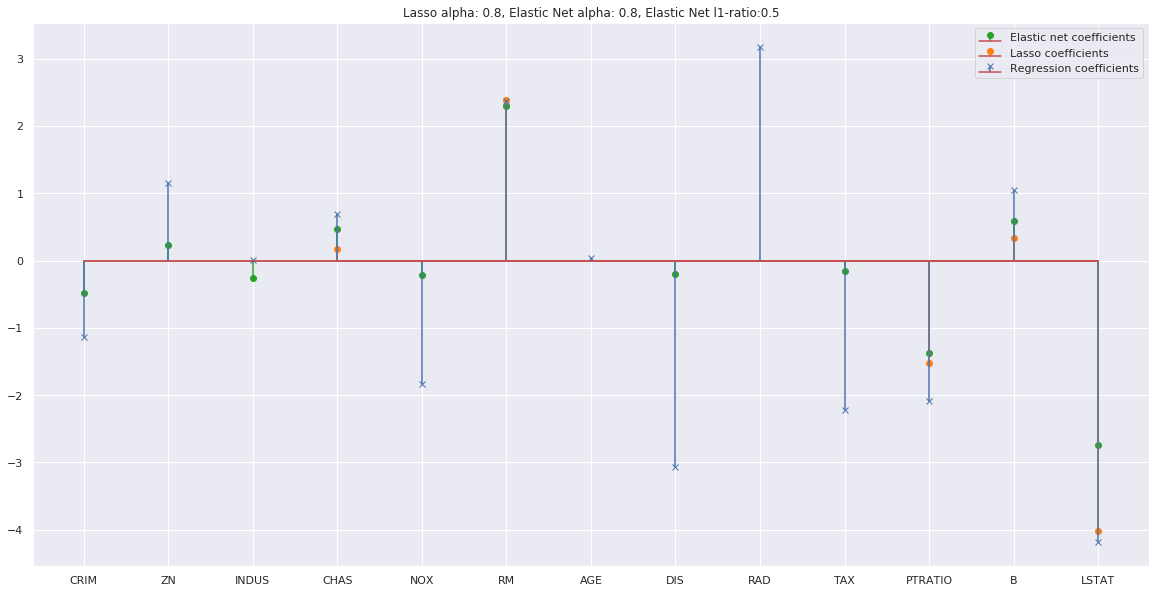

In [51]:
alpha = 0.8

lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

enet = ElasticNet(alpha=0.8, l1_ratio=0.5)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.figure(figsize=(20,10))
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='o', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='o', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(lr.coef_)[0], lr.coef_[lr.coef_ != 0], label='Regression coefficients',
         markerfmt='bx')

plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.legend(loc='best')
plt.title("Lasso alpha: %.1f, Elastic Net alpha: %.1f, Elastic Net l1-ratio:0.5"
          % (alpha, alpha))
plt.show()

ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.715729


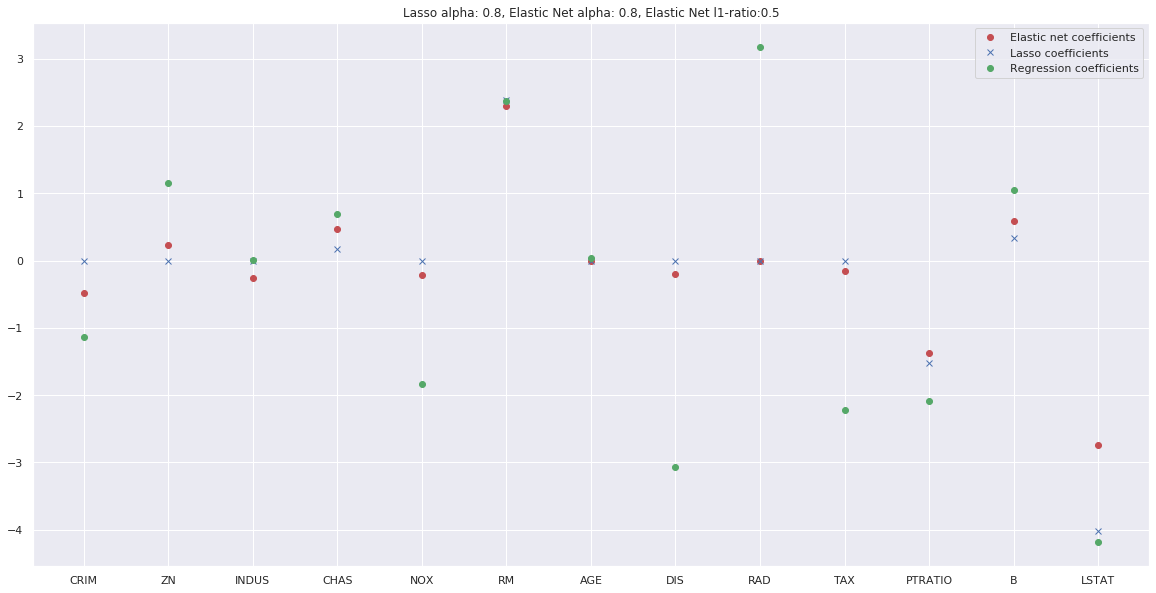

In [41]:
alpha = 0.8

lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
enet = ElasticNet(alpha=0.8, l1_ratio=0.5)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.figure(figsize=(20,10))
plt.plot(enet.coef_, 'o' 'r', label="Elastic net coefficients")
plt.plot(lasso.coef_, 'x' 'b', label="Lasso coefficients")
plt.plot(lr.coef_, 'o' 'g', label="Regression coefficients")

plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.legend(loc='best')
plt.title("Lasso alpha: %.1f, Elastic Net alpha: %.1f, Elastic Net l1-ratio:0.5"
          % (alpha, alpha))
plt.show()

<p>The table below shows the coefficients for each model. With alpha=0.8 for the Lasso model and, with alpha=0.8 and l1-ratio=0.5 for the Elastic net model, it can be seen that elastic net sets to zero the features AGE and RAD. Also, coefficients tend to shrink to zero for the elastic net while for Lasso and the linear regression models tend to a higher value.</p>

<p></p>

In [32]:
df_coefs = pd.DataFrame(lr.coef_.reshape(1,13), index=['Linear Regression'], columns=list(df2.columns.values))
df_coefs_lasso = pd.DataFrame(lasso.coef_.reshape(1,13), index=['Lasso'], columns=list(df2.columns.values))
df_coefs_enet = pd.DataFrame(enet.coef_.reshape(1,13), index=['Elastic Net'], columns=list(df2.columns.values))

pd.concat([df_coefs, df_coefs_lasso, df_coefs_enet])

CRIM        ZN     INDUS      CHAS       NOX        RM  \
Linear Regression -1.135027  1.158145  0.007371  0.687096 -1.828370  2.362719   
Lasso             -0.000000  0.000000 -0.000000  0.177560 -0.000000  2.385886   
Elastic Net       -0.478728  0.225515 -0.259681  0.471988 -0.216145  2.301519   

                        AGE       DIS       RAD       TAX   PTRATIO         B  \
Linear Regression  0.031665 -3.066328  3.166215 -2.214579 -2.086009  1.044951   
Lasso             -0.000000 -0.000000 -0.000000 -0.000000 -1.518516  0.330622   
Elastic Net       -0.000000 -0.194887 -0.000000 -0.152487 -1.380558  0.583188   

                      LSTAT  
Linear Regression -4.176271  
Lasso             -4.025193  
Elastic Net       -2.743015

<p>Finally, the figure below shows the elastic net path. The elastic net produces more non-zero coefficients that lasso, and with smaller magnitudes.</p>

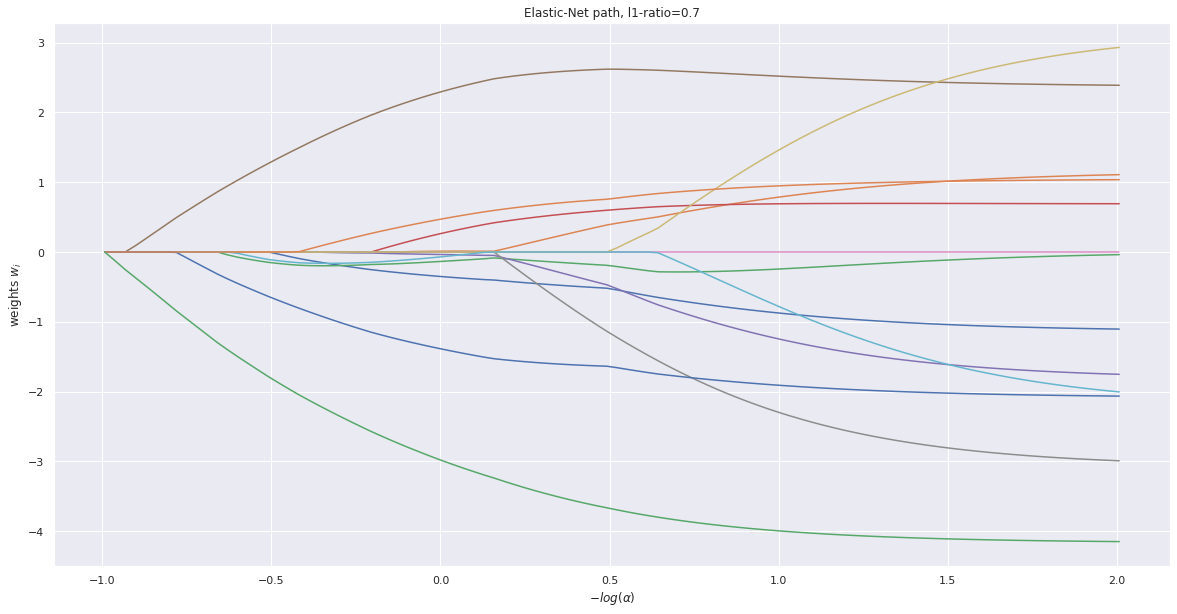

In [52]:
alphas, coefs_path, _ = enet_path(x_train, y_train, l1_ratio=0.7)

plt.figure(figsize=(20,10))
plt.plot(-np.log10(alphas), coefs_path.T)
plt.xlabel(r'$-log(\alpha)$')
plt.ylabel('weights $w_i$')
plt.title('Elastic-Net path, l1-ratio=0.7');

<h1>Synthetic dataset</h1>

<p>In this section I will build a synthetic dataset in order to test the two stages method proposed in 2. The dataset consists in n=100 samples. To each sample there is associated a 40 dimensional vector \( x_i \) given by the following rules</p>

<ul>
    <li>There will be four groups G1, G2, G3, G4</li>
    <li>\( x_1, x_6, x_{11} \) are obtained by a random uniform distribution with values between -0.5 and 0.5.</li>
    <li>The group G1 is given by: \( x_{1+i} = s_i * x_i + \sigma_1 * \epsilon \) for i = 1,...,4</li>
    <li>The group G2 is given by: \( x_{6+i} = s_i * x_i + \sigma_2 * \epsilon \) for i = 1,...,4</li>
    <li>The group G3 is given by: \( x_{11+i} = s_i * x_i + \sigma_3 * \epsilon \) for i = 1,...,4</li>
    <li>Where \( s_i = 1, \textit{i} = 1,...,4 \) and, \( \epsilon \sim N(0,1)\) and \( \sigma_1 = \sigma_2 = \sigma_3 \sim 0.1 \)</li>
    <li>The group G4, \( x_{16},...,x_{40} \), are obtained by a random uniform distribution with values between -0.5 and 0.5.</li>
    <li>The output is obtained according with the following function: \( \textit{y} = -\textit{sign}(X\beta + \epsilon) \) where \( \beta \) is given by:</li>
</ul>

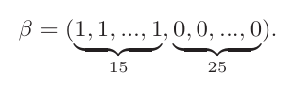

In [94]:
img_beta = mpimg.imread('beta_vector.png')
plt.figure(figsize = (5,5))
plt.axis('off')
imgplot = plt.imshow(img_beta)

In [175]:

#uncomment to create an uniform distribution
#X1 = np.random.uniform(low=-0.5, high=0.5, size=(100,3))
#X2 = np.random.uniform(low=-0.5, high=0.5, size=(100,25))

#uncomment to create a normal distribution
X1 = np.random.normal(loc=0, scale=1, size=(100,3))
X2 = np.random.normal(loc=0, scale=1, size=(100,25))

X = np.insert(X1, [2], X2, axis=1)


error = np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((100,4))
group2 = np.ones((100,4))
group3 = np.ones((100,4))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error_corr

X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [6], group2, axis=1)
X_data = np.insert(X_data, [11], group3, axis=1)

beta = np.zeros((40,1))
beta[0:15] = 1

y = -np.sign((X_data.dot(beta)) + error)

In [176]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
#df3 = pd.concat([df,dfy], axis=1)
#df3.sample(10)

df['output'] = y
df.sample(10)

0         1         2         3         4         5         6  \
63  0.072239  0.073194  0.073194  0.073194  0.073194  1.262843  1.263798   
13  0.058283  0.059238  0.059238  0.059238  0.059238 -0.647588 -0.646632   
36  0.065424  0.066380  0.066380  0.066380  0.066380 -1.705097 -1.704142   
18  1.339078  1.340033  1.340033  1.340033  1.340033 -0.405062 -0.404107   
69  0.880878  0.881834  0.881834  0.881834  0.881834  0.775901  0.776856   
32  0.516041  0.516996  0.516996  0.516996  0.516996 -1.387956 -1.387001   
91 -0.846397 -0.845442 -0.845442 -0.845442 -0.845442 -0.391412 -0.390457   
87 -0.163073 -0.162117 -0.162117 -0.162117 -0.162117 -0.144262 -0.143307   
71  2.549309  2.550265  2.550265  2.550265  2.550265  1.162340  1.163295   
22 -2.043565 -2.042609 -2.042609 -2.042609 -2.042609  0.547959  0.548914   

           7         8         9  ...        31        32        33        34  \
63  1.263798  1.263798  1.263798  ...  0.738287 -2.117843 -0.904908  0.229093   
13 -0.646632 -0.646632 -0.646632  ... -0.887628  0.476961 -0.905751 -0.412546   
36 -1.704142 -1.704142 -1.704142  ... -0.600811 -1.058622 -1.202483  1.373806   
18 -0.404107 -0.404107 -0.404107  ...  1.236248 -0.243231  0.745681 -1.085681   
69  0.776856  0.776856  0.776856  ... -0.885833  1.091183 -1.316610 -1.441091   
32 -1.387001 -1.387001 -1.387001  ...  0.419171 -0.446457 -0.715555  1.915683   
91 -0.390457 -0.390457 -0.390457  ...  1.827811  1.390337  0.098862  0.156329   
87 -0.143307 -0.143307 -0.143307  ... -0.131292 -0.408111  0.031271 -0.712873   
71  1.163295  1.163295  1.163295  ... -2.278983  0.315954 -0.201170  0.799475   
22  0.548914  0.548914  0.548914  ...  2.441152 -1.915493 -1.309717  1.143075   

          35        36        37        38        39  output  
63 -0.015886  0.721732 -0.730645 -0.772840 -0.212298    -1.0  
13  1.953647 -0.140034  0.781381  0.779513 -0.828998     1.0  
36 -0.579439 -0.989129 -0.243210  2.091928  1.453244     1.0  
18 -0.534486  0.730595  2.013242 -0.027766  0.939723    -1.0  
69 -1.024133  0.965419  1.136883 -0.209998  0.465682    -1.0  
32  0.455342  1.306376  0.964554 -0.781868 -0.981097    -1.0  
91 -3.090840  0.525768 -0.678604 -0.645335 -1.142298     1.0  
87 -0.620928 -0.991496  0.789933  0.023922  1.210903    -1.0  
71  1.380436 -0.178963  1.080198  0.680598  2.414369    -1.0  
22  0.000051  0.718451  0.634595 -0.342941 -0.276826     1.0  

[10 rows x 41 columns]

In [177]:
df.describe().T

count      mean       std       min       25%       50%       75%  \
0       100.0 -0.097216  1.012312 -2.294390 -0.830594 -0.072854  0.500615   
1       100.0 -0.096261  1.012312 -2.293434 -0.829639 -0.071898  0.501570   
2       100.0 -0.096261  1.012312 -2.293434 -0.829639 -0.071898  0.501570   
3       100.0 -0.096261  1.012312 -2.293434 -0.829639 -0.071898  0.501570   
4       100.0 -0.096261  1.012312 -2.293434 -0.829639 -0.071898  0.501570   
5       100.0 -0.122704  0.939622 -2.409127 -0.747522 -0.156637  0.562385   
6       100.0 -0.121748  0.939622 -2.408171 -0.746567 -0.155681  0.563340   
7       100.0 -0.121748  0.939622 -2.408171 -0.746567 -0.155681  0.563340   
8       100.0 -0.121748  0.939622 -2.408171 -0.746567 -0.155681  0.563340   
9       100.0 -0.121748  0.939622 -2.408171 -0.746567 -0.155681  0.563340   
10      100.0  0.037932  1.037370 -2.639314 -0.584888 -0.009640  0.700914   
11      100.0  0.038888  1.037370 -2.638358 -0.583932 -0.008685  0.701869   
12      100.0  0.038888  1.037370 -2.638358 -0.583932 -0.008685  0.701869   
13      100.0  0.038888  1.037370 -2.638358 -0.583932 -0.008685  0.701869   
14      100.0  0.038888  1.037370 -2.638358 -0.583932 -0.008685  0.701869   
15      100.0  0.021912  0.923467 -1.906029 -0.752919  0.066464  0.616126   
16      100.0 -0.020907  0.947893 -2.178463 -0.582706 -0.160609  0.554098   
17      100.0  0.065343  1.072361 -2.116964 -0.724963  0.052164  0.880313   
18      100.0  0.016331  0.956438 -2.056960 -0.611531  0.094013  0.701479   
19      100.0 -0.045689  1.231627 -2.903524 -0.969908 -0.038250  0.773645   
20      100.0 -0.006673  0.949996 -2.231782 -0.584261 -0.004536  0.657025   
21      100.0  0.204141  0.970387 -1.821625 -0.394117  0.098472  0.955816   
22      100.0 -0.077755  0.974865 -2.474116 -0.867784 -0.138473  0.506867   
23      100.0 -0.252218  1.025993 -2.765470 -0.849328 -0.203056  0.486928   
24      100.0 -0.009533  1.077816 -2.165250 -0.782550 -0.129942  0.533837   
25      100.0  0.009795  1.001276 -3.167920 -0.649850  0.055479  0.561022   
26      100.0  0.039813  0.954906 -2.368327 -0.626791 -0.005622  0.704847   
27      100.0  0.004460  0.904309 -1.887466 -0.602515  0.025860  0.615620   
28      100.0  0.104125  0.950468 -2.183117 -0.644633  0.070493  0.769210   
29      100.0 -0.010216  0.990423 -2.667812 -0.592201 -0.055302  0.713521   
30      100.0  0.142538  1.104897 -2.100107 -0.685237  0.167434  0.929621   
31      100.0 -0.003965  1.002286 -2.346921 -0.587640 -0.041076  0.641812   
32      100.0  0.024718  1.105237 -2.842663 -0.713234  0.052316  0.618365   
33      100.0  0.072016  0.932910 -1.727390 -0.612316  0.037476  0.694661   
34      100.0 -0.196761  1.071625 -3.685572 -1.048838 -0.122514  0.604842   
35      100.0  0.153643  1.022745 -3.090840 -0.403193  0.150792  0.745268   
36      100.0 -0.241703  1.007572 -2.416153 -0.981651 -0.239827  0.571167   
37      100.0  0.011788  0.956627 -2.426830 -0.671805 -0.109868  0.769956   
38      100.0  0.017825  1.061146 -2.526748 -0.745196 -0.027339  0.658366   
39      100.0  0.109905  0.891321 -2.204418 -0.497667  0.060089  0.746944   
output  100.0  0.000000  1.005038 -1.000000 -1.000000  0.000000  1.000000   

             max  
0       2.549309  
1       2.550265  
2       2.550265  
3       2.550265  
4       2.550265  
5       2.205621  
6       2.206576  
7       2.206576  
8       2.206576  
9       2.206576  
10      2.277259  
11      2.278214  
12      2.278214  
13      2.278214  
14      2.278214  
15      2.033005  
16      2.980826  
17      2.510291  
18      1.946245  
19      2.964286  
20      2.064914  
21      2.293763  
22      2.979984  
23      1.983326  
24      4.526410  
25      2.266295  
26      2.164850  
27      2.194446  
28      2.531346  
29      2.282101  
30      2.981863  
31      2.608489  
32      3.019009  
33      3.083130  
34      1.915683  
35      2.416556  
36      2.043608  
37      2.205288  
38      2.703406  
39      2.414

<p>The figure below shows the matrix correlation for the synthetic data set.</p>

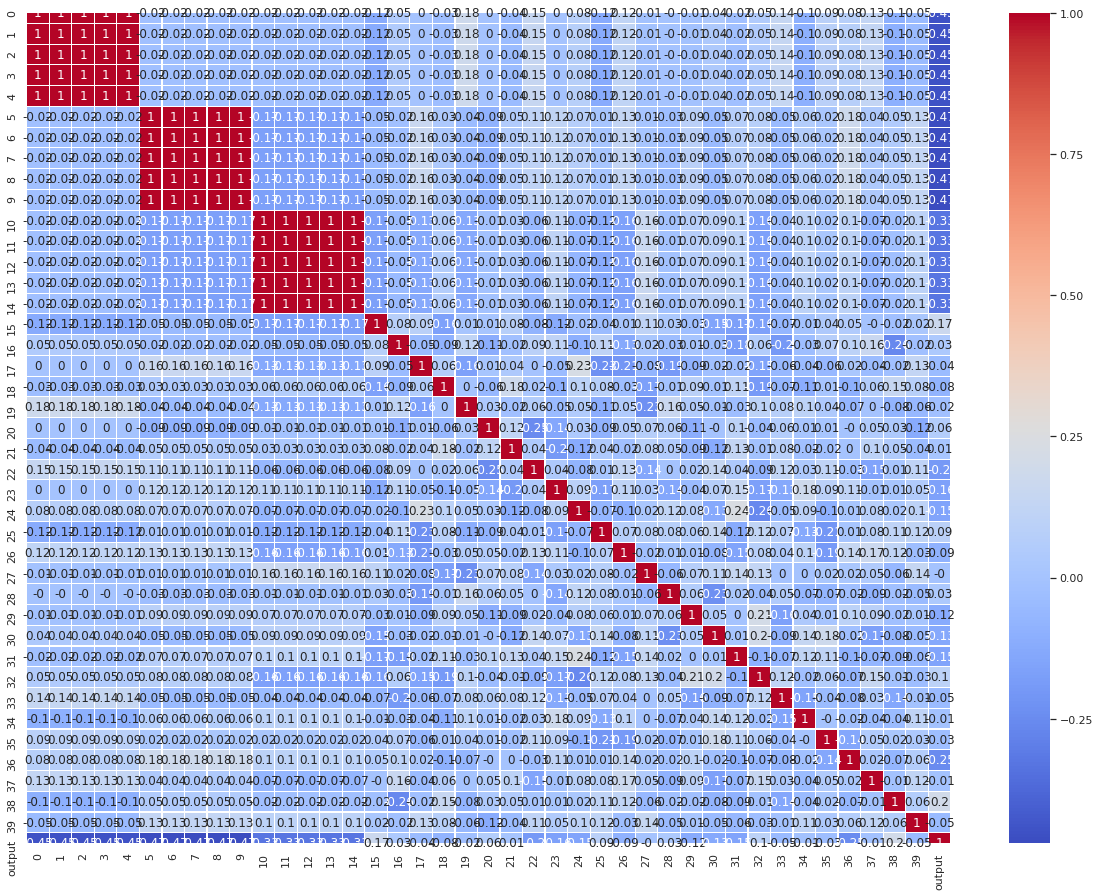

In [178]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [13]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [180]:
print("Mean Dataset: %.4f"%np.mean(X_data))
print("Std dataset: %4f"%np.std(X_data))

Mean Dataset: -0.0191
Std dataset: 1.003022


<p>Then, I run the stage I of the method proposed in [1] by setting \( \mu = 0 \). I repeat the experiment 20 times over the same dataset. The table below shows the results of the experiment.</p>

In [183]:
def stage_one(mu, X, y):
    #taus = np.logspace(-1,5,5)
    taus = np.linspace(0.1,0.9,10)
    #taus = np.logspace(-1,5,5)
    
    alphas = []
    l1_ratios = []

    for tau in taus:
        alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
        alphas.append(alpha)
        l1_ratios.append(l1_ratio)

    tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

    enet = ElasticNet(max_iter=1000)
    
    scores = []
    coefs_found = []
    best_params = []
    find_coefs = []

    K = 5
    kf = StratifiedKFold(n_splits=K, shuffle=True)
    kf.get_n_splits(X_data,y)
    for train_index, test_index in kf.split(X, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = GridSearchCV(enet, tuned_parameters)
        clf.fit(x_train, y_train)

        coefs = clf.best_estimator_.coef_
        params = clf.best_params_
        score = clf.score(x_test, y_test)

        coefs_found.append(coefs)
        #nonzero_coefs = np.nonzero(coefs)[1]
        #print(nonzero_coefs)
        best_params.append(params) 
        scores.append(score)
        #find_coefs += list(nonzero_coefs)

    max_score_index = np.where(scores == np.amax(scores))
    #print(scores)
    #print(max_score_index)
    #print("Best parameters after cross validation with mu= %d"%mu)
    #print(best_params[max_score_index[0][0]])

    #print("Performace")
    #print(scores[max_score_index[0][0]])

    cfs = np.asarray(coefs_found[max_score_index[0][0]])
    #print(cfs.shape)
    numCoefs = np.array(cfs[cfs != 0])
    #print(numCoefs.shape)
    
    index_cfs = np.where(cfs != 0)
    
    params = best_params[max_score_index[0][0]]
    tau, _ = alphal1ratio_to_taumu(params['alpha'], params['l1_ratio'])
    
    return len(numCoefs), index_cfs, scores[max_score_index[0][0]], tau

In [184]:
numCoefs1, coefs1, score1, tau1 = stage_one(0, X_data, y)
numCoefs2, coefs2, score2, tau2 = stage_one(0, X_data, y)
numCoefs3, coefs3, score3, tau3 = stage_one(0, X_data, y)
numCoefs4, coefs4, score4, tau4 = stage_one(0, X_data, y)
numCoefs5, coefs5, score5, tau5 = stage_one(0, X_data, y)
numCoefs6, coefs6, score6, tau6 = stage_one(0, X_data, y)
numCoefs7, coefs7, score7, tau7 = stage_one(0, X_data, y)
numCoefs8, coefs8, score8, tau8 = stage_one(0, X_data, y)
numCoefs9, coefs9, score9, tau9 = stage_one(0, X_data, y)
numCoefs10, coefs10, score10, tau10 = stage_one(0, X_data, y)
numCoefs11, coefs11, score11, tau11 = stage_one(0, X_data, y)
numCoefs12, coefs12, score12, tau12 = stage_one(0, X_data, y)
numCoefs13, coefs13, score13, tau13 = stage_one(0, X_data, y)
numCoefs14, coefs14, score14, tau14 = stage_one(0, X_data, y)
numCoefs15, coefs15, score15, tau15 = stage_one(0, X_data, y)
numCoefs16, coefs16, score16, tau16 = stage_one(0, X_data, y)
numCoefs17, coefs17, score17, tau17 = stage_one(0, X_data, y)
numCoefs18, coefs18, score18, tau18 = stage_one(0, X_data, y)
numCoefs19, coefs19, score19, tau19 = stage_one(0, X_data, y)
numCoefs20, coefs20, score20, tau20 = stage_one(0, X_data, y)

In [185]:
data = [
    [numCoefs1, coefs1, score1, tau1],
    [numCoefs2, coefs2, score2, tau2],
    [numCoefs3, coefs3, score3, tau3],
    [numCoefs4, coefs4, score4, tau4],
    [numCoefs5, coefs5, score5, tau5],
    [numCoefs6, coefs6, score6, tau6],
    [numCoefs7, coefs7, score7, tau7],
    [numCoefs8, coefs8, score8, tau8],
    [numCoefs9, coefs9, score9, tau9],
    [numCoefs10, coefs10, score10, tau10],
    [numCoefs11, coefs11, score11, tau11],
    [numCoefs12, coefs12, score12, tau12],
    [numCoefs13, coefs13, score13, tau13],
    [numCoefs14, coefs14, score14, tau14],
    [numCoefs15, coefs15, score15, tau15],
    [numCoefs16, coefs16, score16, tau16],
    [numCoefs17, coefs17, score17, tau17],
    [numCoefs18, coefs18, score18, tau18],
    [numCoefs19, coefs19, score19, tau19],
    [numCoefs20, coefs20, score20, tau20]
]

df = pd.DataFrame(data, columns=['Number of selected features', 'Selected features', 'Score', 'Tau'])
df

Number of selected features  \
0                            11   
1                             9   
2                             7   
3                            11   
4                            12   
5                             9   
6                            12   
7                             8   
8                            15   
9                            12   
10                           14   
11                            7   
12                           15   
13                            9   
14                           12   
15                            8   
16                           11   
17                           10   
18                           10   
19                           13   

                                    Selected features     Score  Tau  
0         ([0, 1, 5, 6, 10, 11, 24, 30, 32, 36, 38],)  0.657908  0.1  
1                ([0, 1, 5, 10, 22, 30, 31, 32, 38],)  0.632153  0.1  
2                       ([0, 5, 10, 11, 22, 32, 38],)  0.629883  0.1  
3         ([0, 1, 5, 6, 10, 22, 24, 30, 32, 36, 38],)  0.654816  0.1  
4      ([0, 1, 2, 3, 5, 10, 11, 24, 30, 32, 36, 38],)  0.543970  0.1  
5                ([0, 5, 6, 10, 22, 24, 30, 36, 38],)  0.649599  0.1  
6     ([0, 1, 5, 6, 10, 11, 22, 24, 30, 32, 36, 38],)  0.673395  0.1  
7                     ([0, 1, 2, 5, 10, 16, 36, 38],)  0.560498  0.1  
8   ([0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 22, 24, 32, ...  0.675315  0.1  
9     ([0, 1, 5, 6, 10, 15, 22, 24, 30, 32, 36, 38],)  0.626205  0.1  
10  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 24, 30, 36, 3...  0.659579  0.1  
11                       ([0, 5, 6, 10, 24, 32, 38],)  0.565716  0.1  
12  ([0, 5, 6, 7, 10, 11, 12, 14, 22, 23, 24, 30, ...  0.619198  0.1  
13                ([0, 5, 8, 9, 10, 24, 32, 36, 38],)  0.636211  0.1  
14  ([0, 5, 10, 11, 18, 22, 24, 29, 30, 31, 32, 38],)  0.578251  0.1  
15                    ([0, 2, 5, 6, 10, 24, 32, 38],)  0.639985  0.1  
16      ([0, 5, 10, 11, 12, 13, 22, 24, 30, 32, 38],)  0.666957  0.1  
17            ([0, 5, 6, 7, 10, 11, 24, 30, 36, 38],)  0.626345  0.1  
18           ([0, 1, 5, 10, 11, 18, 22, 32, 36, 38],)  0.669176  0.1  
19  ([0, 1, 3, 5, 10, 11, 14, 22, 24, 30, 32, 36, ...  0.745293  0.1

<p>The figure below shows a histogram which represent the number of variables of the obtained model over 20 trials.</p>

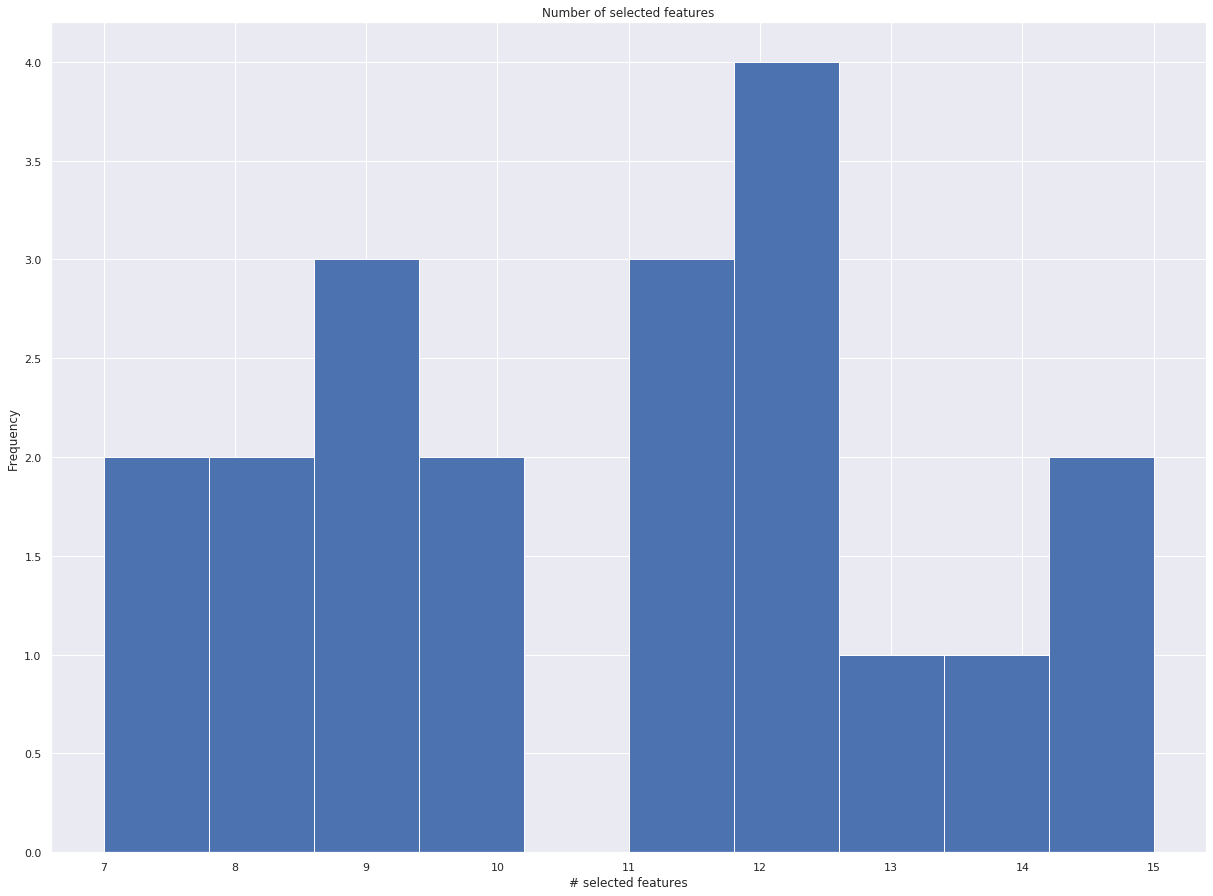

In [186]:
hist = df.hist(column='Number of selected features')
for ax in hist.flatten():
    ax.set_xlabel("# selected features")
    ax.set_ylabel("Frequency")
    


<p>Then, I run the stage II by setting \( \mu = 1000 * \tau \). The table below shows the results.</p>

In [97]:
mu = 1e3 * tau6
numCoefs, coefs, score, tau = stage_one(mu, X_data, y)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model

[0.019496090755131035, 0.018026737158967965, 0.01904042391592886, 0.020536695861974152, 0.02057593349860365]


In [98]:
data = [
    [numCoefs, coefs, score, tau],
]

print("Variables selected")
print(coefs)
df = pd.DataFrame(data, columns=['Number of variables selected', 'Predictors selected', 'Score', 'Tau'])
df

Variables selected
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       21, 22, 28, 33, 34, 36, 37]),)


Number of variables selected  \
0                            24   

                                 Predictors selected     Score  Tau  
0  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...  0.020576  0.1

<h1>Real Data</h1>

In [2]:
import os
import tarfile
import urllib.request as urllib
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import lasso_path
from sklearn import preprocessing
from sklearn.svm import l1_min_c
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

<p>In this section, I implemented the visualization method which was proposed in reference [2]. I used the Golub Dataset. The dataset contains data for two different types of cancer, acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).</p>

In [3]:
data = pd.read_csv('data/gedm.csv', header=0, index_col=0).T
print("n_samples = {} | n_variables = {}".format(*data.shape))

n_samples, n_variables = data.shape
data.head()

n_samples = 38 | n_variables = 7129


Gene Accession Number  AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  \
1                                -214            -153             -58   
2                                -139             -73              -1   
3                                 -76             -49            -307   
4                                -135            -114             265   
5                                -106            -125             -76   

Gene Accession Number  AFFX-BioC-5_at  AFFX-BioC-3_at  AFFX-BioDn-5_at  \
1                                  88            -295             -558   
2                                 283            -264             -400   
3                                 309            -376             -650   
4                                  12            -419             -585   
5                                 168            -230             -284   

Gene Accession Number  AFFX-BioDn-3_at  AFFX-CreX-5_at  AFFX-CreX-3_at  \
1                                  199            -176             252   
2                                 -330            -168             101   
3                                   33            -367             206   
4                                  158            -253              49   
5                                    4            -122              70   

Gene Accession Number  AFFX-BioB-5_st  ...  U48730_at  U58516_at  U73738_at  \
1                                 206  ...        185        511       -125   
2                                  74  ...        169        837        -36   
3                                -215  ...        315       1199         33   
4                                  31  ...        240        835        218   
5                                 252  ...        156        649         57   

Gene Accession Number  X06956_at  X16699_at  X83863_at  Z17240_at  \
1                            389        -37        793        329   
2                            442        -17        782        295   
3                            168         52       1138        777   
4                            174       -110        627        170   
5                            504        -26        250        314   

Gene Accession Number  L49218_f_at  M71243_f_at  Z78285_f_at  
1                               36          191          -37  
2                               11           76          -14  
3                               41          228          -41  
4                              -50          126          -91  
5                               14           56          -25  

[5 rows x 7129 columns]

In [5]:
labels = pd.read_csv('data/labels.csv', header=0, index_col=0)
print("n_samples (AML) = {} | n_samples (ALL) = {}".format(
    np.sum(labels.values == 'AML'), np.sum(labels.values == 'ALL')))

labels.sample(5)

n_samples (AML) = 11 | n_samples (ALL) = 27


status
sample       
17        ALL
3         ALL
33        AML
26        ALL
20        ALL

In [6]:
binary_labels = np.where(labels.values == 'ALL', 1, -1)
print("n_samples (AML) = {} | n_samples (ALL) = {}".format(
    np.sum(binary_labels == -1), np.sum(binary_labels == 1)))
print(np.asarray(labels["status"]).shape)
print(binary_labels.shape)

n_samples (AML) = 11 | n_samples (ALL) = 27
(38,)
(38, 1)


In [7]:
relevant_features = data[data.columns.drop(list(data.filter(regex='AFFX')))]
relevant_features.sample(5)

Gene Accession Number  hum_alu_at  A28102_at  AB000114_at  AB000115_at  \
5                           18128        118           16          197   
30                          11983        382            1          239   
38                          19406        357          -17           74   
7                           30801        458          -10          168   
18                          23505         85           49          197   

Gene Accession Number  AB000220_at  AB000409_at  AB000449_at  AB000450_at  \
5                               39          237          311          186   
30                              72          377           96          173   
38                              51           88          111           96   
7                               10           87          131          199   
18                              13           30          165          166   

Gene Accession Number  AB000460_at  AB000462_at  ...  U48730_at  U58516_at  \
5                             1608          204  ...        156        649   
30                            1767          367  ...        225        737   
38                            1825           73  ...        103       1121   
7                             1784           52  ...         30        819   
18                            1288          136  ...        186        573   

Gene Accession Number  U73738_at  X06956_at  X16699_at  X83863_at  Z17240_at  \
5                             57        504        -26        250        314   
30                            63        472         33        737        227   
38                           102        330       -112       1567        627   
7                           -178        151        -18       1140        482   
18                           -57        694        -19        636        205   

Gene Accession Number  L49218_f_at  M71243_f_at  Z78285_f_at  
5                               14           56          -25  
30                              -9          371          -31  
38                              21         2520            0  
7                               10          369          -42  
18                              17          127          -13  

[5 rows x 7071 columns]

<p>The dataset contains 38 samples and 7071 relevant features. I used PCA to visualize the data.</p>

Reduced X shape = (38, 2)


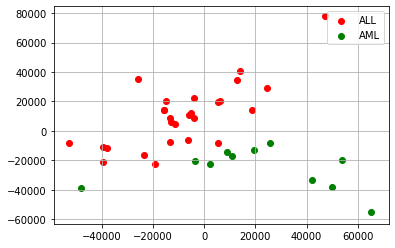

In [10]:
X_reduced = PCA(n_components=2).fit_transform(data)
print("Reduced X shape = {}".format(X_reduced.shape))

classes = np.unique(labels.values)
colors = np.array(["red", "green"])

fig, ax = plt.subplots()
for ii in range(len(classes)):
    x = X_reduced[:,0]
    y = X_reduced[:,1]
    
    l = labels.values.reshape(38,)
    sel = l == classes[ii]
    
    newX = x[sel]
    newY = y[sel]
    ax.scatter(newX, newY, c=colors[ii], label=classes[ii])
    
ax.legend()
ax.grid(True)
plt.show()

<p>Then, I applied the two stage method setting 4 different values to \( \mu \) keeping track of the all variables selected and the score on each iteration. The values for \( \mu \) were \( \mu_0 = 1e4, \mu_1 = 1e5, \mu_2 = 1e7, \mu_3 = 1e8 \). The table below shows a sample of the lists obtained.</p>

In [11]:
def nested_split(mu, X, y):
    taus = np.logspace(-1,5,5)
    
    X, y = data.values, binary_labels.ravel()

    K = 3
    kf = StratifiedKFold(n_splits=K, shuffle=True)

    enet = ElasticNetClassifier()
    
    alphas = []
    l1ratios = []
    for tau in taus:
        alpha, l1_ratio = taumu_to_alphal1ratio(tau,mu)
        alphas.append(alpha)
        l1ratios.append(l1_ratio)
        
    params = {'alpha': alphas, 'l1_ratio': l1ratios}
    
    #scores, coefs = [], []
    scores, find_coefs = [], []
    kf.get_n_splits(X, y)
    for train_index, text_index in kf.split(X, y):
        x_train, x_test = X[train_index], X[text_index]
        y_train, y_test = y[train_index], y[text_index]
        
        cv = GridSearchCV(enet, params)
        cv.fit(x_train, y_train)
        coefs = cv.best_estimator_.coef_
        nonzero_coefs = np.nonzero(coefs)[1]
        score = cv.score(x_test, y_test)
        
        find_coefs += list(nonzero_coefs)
        scores.append(score)        
    
    return Counter(find_coefs), scores

In [14]:
X, y = data.values, binary_labels.ravel()

fr0, acc0 = nested_split(1e4, X, y)
fr1, acc1 = nested_split(1e5, X, y)
fr2, acc2 = nested_split(1e7, X, y)
fr3, acc3 = nested_split(1e8, X, y)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationW

In [15]:
def build_dataframe(fr, suffix=''):
    df = pd.DataFrame(data=list(fr.values()),
                      index=data.columns[list(fr.keys())], columns=['Selection frequency' + suffix])
    df = df.sort_values(by='Selection frequency' + suffix, ascending=False)
    return df

In [16]:
df0 = build_dataframe(fr0, '_mu_0')
df1 = build_dataframe(fr1, '_mu_1')
df2 = build_dataframe(fr2, '_mu_2')
df3 = build_dataframe(fr3, '_mu_3')

df = pd.concat([df0, df1, df2, df3], axis=1)
df = df.sort_values('Selection frequency_mu_3', ascending=False).fillna(0)

In [17]:
df.sample(10)

Selection frequency_mu_0  Selection frequency_mu_1  \
M97016_s_at                              0.0                       0.0   
HG2797-HT2905_s_at                       0.0                       0.0   
U33203_s_at                              0.0                       0.0   
X95239_at                                0.0                       0.0   
U34301_r_at                              0.0                       0.0   
U25138_at                                0.0                       0.0   
U46461_at                                0.0                       0.0   
M34516_at                                1.0                       3.0   
HG3998-HT4268_at                         0.0                       0.0   
D87452_at                                0.0                       0.0   

                    Selection frequency_mu_2  Selection frequency_mu_3  
M97016_s_at                              3.0                         3  
HG2797-HT2905_s_at                       3.0                         3  
U33203_s_at                              3.0                         3  
X95239_at                                3.0                         3  
U34301_r_at                              3.0                         3  
U25138_at                                3.0                         3  
U46461_at                                3.0                         3  
M34516_at                                3.0                         3  
HG3998-HT4268_at                         3.0                         3  
D87452_at                                3.0                         3

<p>Each column in the table represents the frequency of selection of each variable for a different value of \( \mu \). To visualize the lists I plot a Manhattan chart for each value of \( \mu \).</p>

Text(0.5, 1.0, 'Manhattan plot (mu_3) [acc: 0.868]')

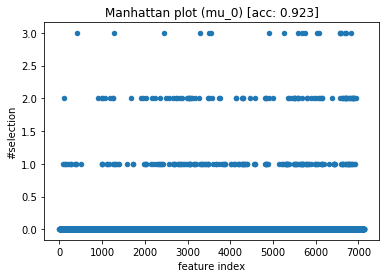

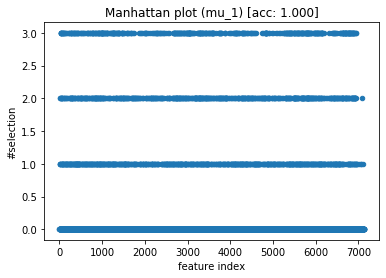

<Figure size 432x288 with 0 Axes>

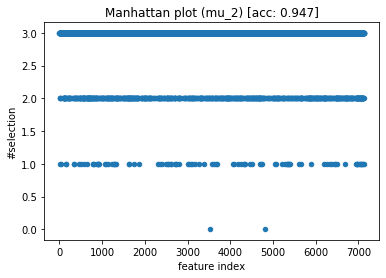

<Figure size 432x288 with 0 Axes>

In [33]:
df['index'] = range(len(df))
#plt.figure()

ax0 = df.plot.scatter(x="index", y="Selection frequency_mu_0")
ax0.set_xlabel("feature index")
ax0.set_ylabel("#selection")
ax0.set_title('Manhattan plot (mu_0) [acc: {:2.3f}]'.format(np.mean(acc0)))

ax1 = df.plot.scatter(x="index", y="Selection frequency_mu_1")
ax1.set_xlabel("feature index")
ax1.set_ylabel("#selection")
ax1.set_title('Manhattan plot (mu_1) [acc: {:2.3f}]'.format(np.mean(acc1)))

plt.figure()
ax2 = df.plot.scatter(x="index", y="Selection frequency_mu_2")
ax2.set_xlabel("feature index")
ax2.set_ylabel("#selection")
ax2.set_title('Manhattan plot (mu_2) [acc: {:2.3f}]'.format(np.mean(acc2)))

plt.figure()
ax3 = df.plot.scatter(x="index", y="Selection frequency_mu_3")
ax3.set_xlabel("feature index")
ax3.set_ylabel("#selection")
ax3.set_title('Manhattan plot (mu_3) [acc: {:2.3f}]'.format(np.mean(acc3)))

<p>Taking the features in \( \mu_0 \) with a frequency equal or greater than 3 as the minimal list and taking the features in \( \mu_1 \) with a frequency equal or greater than 3 as the maximal list. I compute the Pearson correlation between lists and get groups of features correlated. To visualize this I plot the matrix correlation between groups.</p>

In [34]:
minimal_features_sel = df['Selection frequency_mu_0']>=3
minimal_dataset = data.loc[:,minimal_features_sel]
maximal_features_sel =df['Selection frequency_mu_1']>=3
maximal_dataset = data.loc[:,maximal_features_sel]

In [35]:
print("n_minimal_variables = {} | n_maximal_variables = {}".format(minimal_dataset.shape[1], maximal_dataset.shape[1]))

n_minimal_variables = 19 | n_maximal_variables = 521


In [36]:
def pearson_correlation(x, y):
    corr, _ = pearsonr(x, y)
    return corr

In [37]:
corr = pairwise_kernels(minimal_dataset.values.T, maximal_dataset.values.T, metric=pearson_correlation)
print(corr.shape)

(19, 521)


In [38]:
groups = np.argmax(corr, axis=0)

name_groups = np.unique(groups)

group_to_genes = {}
for name in name_groups:
    group_to_genes[name] = maximal_dataset.columns.values[np.where(groups == name)[0]]

In [39]:
corr_all_genes = pairwise_kernels(maximal_dataset.values.T, maximal_dataset.values.T, metric=pearson_correlation)

df_corr_all_genes = pd.DataFrame(corr_all_genes)
df_corr_all_genes.head()

0         1         2         3         4         5         6    \
0  1.000000  0.349720  0.239489 -0.071703  0.123202  0.287940  0.063645   
1  0.349720  1.000000  0.868166 -0.055666  0.100971  0.214063  0.086100   
2  0.239489  0.868166  1.000000 -0.038540  0.068626  0.177603  0.025142   
3 -0.071703 -0.055666 -0.038540  1.000000  0.790358  0.758035  0.714444   
4  0.123202  0.100971  0.068626  0.790358  1.000000  0.919791  0.619351   

        7         8         9    ...       511       512       513       514  \
0  0.072570 -0.077637 -0.130287  ... -0.055066 -0.405970 -0.469624 -0.494039   
1  0.026218  0.442329  0.069843  ... -0.210680 -0.188104 -0.222764 -0.227626   
2 -0.081401  0.551951  0.175290  ... -0.223593 -0.153888 -0.183453 -0.188477   
3  0.638172  0.112810  0.027780  ...  0.000565  0.060859  0.213224  0.172098   
4  0.651072  0.056844  0.052228  ... -0.175132 -0.089435  0.038113 -0.014185   

        515       516       517       518       519       520  
0 -0.212156 -0.370525 -0.092090 -0.405136 -0.384740 -0.153837  
1 -0.149533 -0.107915  0.078105 -0.109105 -0.080409 -0.256023  
2 -0.198641 -0.025239  0.076594 -0.063604 -0.059856 -0.252050  
3 -0.087943 -0.011893  0.554579 -0.141139  0.166301 -0.066088  
4 -0.155030 -0.018508  0.527988 -0.355781  0.029117 -0.103418  

[5 rows x 521 columns]

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr_all_genes)
plt.show()

<p>The final result shows that there are 521 relevant features in the dataset. The heatmap allows to identify different groups of correlated features in the data set.</p>

In [41]:
columns = np.asarray(maximal_dataset.columns)
df_corr_all_genes.columns = columns

sortColumns = []
for _, value in group_to_genes.items():
    for name in value:
        sortColumns.append(name)
    

df_sort_columns = df_corr_all_genes[sortColumns]
df_corr_all_genes.shape

(521, 521)

(521, 521)


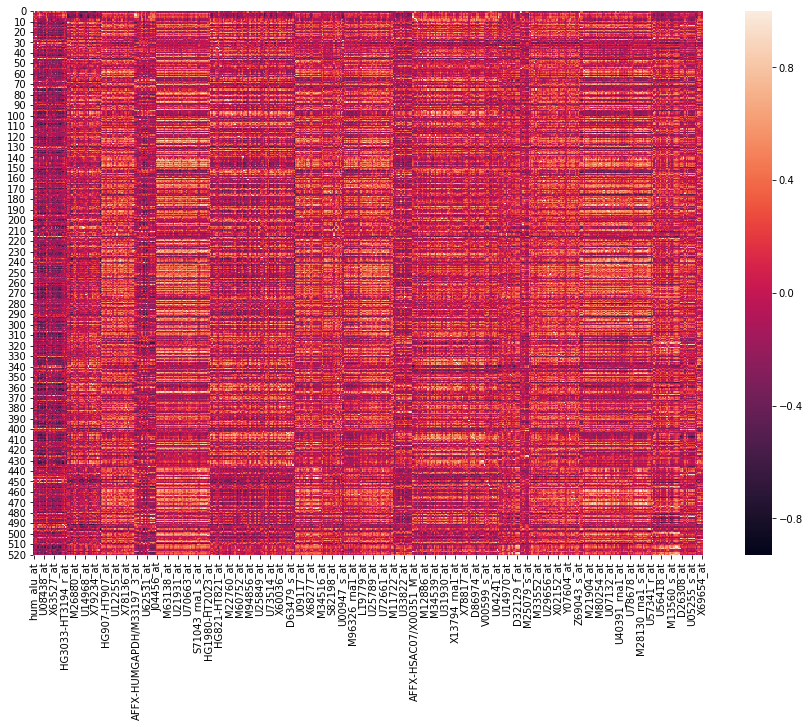

In [44]:
print(df_sort_columns.shape)
plt.figure(figsize=(15, 10))
# complete here #
sns.heatmap(df_sort_columns)
plt.show()